<a href="https://colab.research.google.com/github/hepham/graduation_thesis/blob/main/CNNkeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K
import math
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path_train='/content/gdrive/MyDrive/datakltn/datasetCNN.csv'

Mounted at /content/gdrive


In [ ]:
data_train=pd.read_csv(path_train)
# data_test=pd.read_csv(path_test)
# data_train.info()
data_survey=data_train.to_numpy()
print(data_survey[0])

[-63 -69 -74 -74 -77 -71 -72 -64 -62 -70 -60 -64 -75 -76 -66 -71 -75 -64
 -70 -70 -60 -63 -73 -70 -75 -70 -76 -67 -68 -69 -64 -68 -71 -72 -77 -74
 -76 -61 -69 -73 -60 -64 -74 -75 -71 -77 -70 -63 -69 -75 -60 -70 -71 -77
 -67 -70 -69 -66 -61 -71 -61 -66 -73 -80 -71 -79 -73 -67 -68 -75 -62 -63
 -73 -76 -80 -78 -69 -63 -70 -72 -64 -64 -71 -75 -79 -70 -70 -62 -69 -73
 -64 -68 -72 -81 -78 -76 -69 -60 -69 -71   0]


[-60, -60, -61, -59, -60, -60, -58, -60, -60, -61, -61, -60, -58, -59, -61, -61, -60, -59, -60, -60, -60, -60, -61, -59, -60, -58, -60, -62, -64, -58, -58, -58, -60, -58, -60, -62, -59, -59, -60, -59, -63, -63, -62, -58, -60, -59, -60, -56, -57, -57]


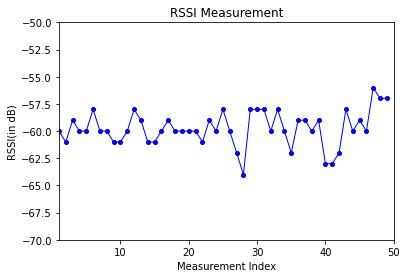

In [ ]:
# x axis values
x=[]
y=[]
for i in range (50):
  y.append(data_survey[i+600][6])
  x.append(i)
print(y)
# # corresponding y axis values
  
# plotting the points 
plt.plot(x, y, color='blue',linewidth = 1,
         marker='o', markerfacecolor='blue', markersize=4)
  
# setting x and y axis range
plt.xlim(1,50)
plt.ylim(-70,-50)
  
# naming the x axis
plt.xlabel('Measurement Index')
# naming the y axis
plt.ylabel('RSSI(in dB)')
  
# giving a title to my graph
plt.title('RSSI Measurement')  
# function to show the plot
plt.show()

In [ ]:
data_train.head(10)
print("shape:",data_train.shape)
data_train=data_train.abs()

shape: (4859, 101)


In [ ]:
def prepare_data():
 # Selecting the Feature, by remove the unused feature 
  feature = ['Position Label']
  train_feature =data_train.drop(feature, axis=1)

  # Set The Target
  train_target = data_train["Position Label"]
  # Split Data
  from sklearn.model_selection import train_test_split, cross_val_score
  X_train, X_test, y_train, y_test = train_test_split(train_feature ,train_target, test_size=0.3, random_state=42)
  X_train=X_train.to_numpy()
  X_test=X_test.to_numpy()
  y_train=y_train.to_numpy()
  y_test = y_test .to_numpy()
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = prepare_data()

In [ ]:
X_train = X_train[:, 0:].reshape(X_train.shape[0],10, 10,1).astype( 'float32' )
X_test = X_test[:, 0:].reshape(X_test.shape[0],10, 10,1).astype( 'float32' )
print(len(X_train))
print(len(X_test))

3401
1458


In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
filepath = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'

In [ ]:
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

In [ ]:
model = Sequential()
model.add(Convolution2D(128,kernel_size=(5,5),padding='same' , input_shape=(10,10,1),activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128,kernel_size=(5,5),padding='same' ,activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation= 'relu' ))
model.add(Dense(80, activation= 'softmax' ))
  # Compile model
model.compile(loss= 'sparse_categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [ ]:
history=model.fit(X_train, y_train,
          epochs=100,
          batch_size= 128, validation_data=(X_test, y_test))

Epoch 1/100
27/27 [==============================] - 7s 261ms/step - loss: 0.2573 - accuracy: 0.9180 - val_loss: 0.3586 - val_accuracy: 0.9417
Epoch 2/100
27/27 [==============================] - 6s 224ms/step - loss: 0.2945 - accuracy: 0.9071 - val_loss: 0.3470 - val_accuracy: 0.9472
Epoch 3/100
27/27 [==============================] - 6s 219ms/step - loss: 0.2833 - accuracy: 0.9144 - val_loss: 0.3638 - val_accuracy: 0.9465
Epoch 4/100
27/27 [==============================] - 6s 225ms/step - loss: 0.2717 - accuracy: 0.9194 - val_loss: 0.3336 - val_accuracy: 0.9492
Epoch 5/100
27/27 [==============================] - 6s 222ms/step - loss: 0.2774 - accuracy: 0.9141 - val_loss: 0.4024 - val_accuracy: 0.9294
Epoch 6/100
27/27 [==============================] - 6s 214ms/step - loss: 0.2972 - accuracy: 0.9050 - val_loss: 0.3213 - val_accuracy: 0.9623
Epoch 7/100
27/27 [==============================] - 6s 225ms/step - loss: 0.2844 - accuracy: 0.9147 - val_loss: 0.3873 - val_accuracy: 0.9328

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


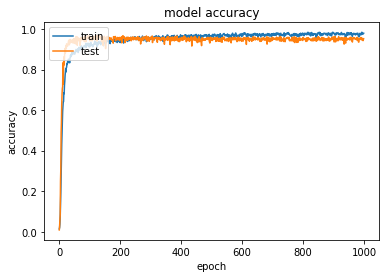

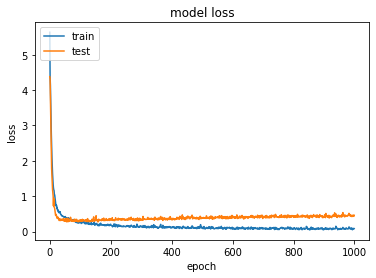

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=128) 
print("test loss, test acc:", score)

12/12 [==============================] - 1s 44ms/step - loss: 0.3131 - accuracy: 0.9643
test loss, test acc: [0.31306490302085876, 0.9643347263336182]


In [ ]:
import csv
fields=['epoch','loss training','loss testing','accuracy training','accuracy validation']
rows=[]
epoch=[i for i in range(0,1000)]
loss_training=history.history['loss']
loss_validate=history.history['val_loss']
training_acuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
for i in range (1000):
  row=[i,loss_training[i],loss_validate[i],training_acuracy[i],val_accuracy[i]]
  rows.append(row)
print(rows)
filename="/content/gdrive/MyDrive/recordCNN.csv"
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)

[[0, 5.634705543518066, 4.378690242767334, 0.01411349605768919, 0.008916324004530907], [1, 4.365264892578125, 4.315884590148926, 0.020288150757551193, 0.02743484266102314], [2, 4.13937520980835, 3.799858331680298, 0.037930019199848175, 0.05281206965446472], [3, 3.6277740001678467, 3.2460384368896484, 0.07233166694641113, 0.08504801243543625], [4, 3.153902292251587, 2.663926362991333, 0.12466921657323837, 0.2503429353237152], [5, 2.7626121044158936, 2.284311056137085, 0.1946486383676529, 0.3086419701576233], [6, 2.378668785095215, 1.7867683172225952, 0.2810938060283661, 0.48765432834625244], [7, 2.1007938385009766, 1.5867878198623657, 0.3428403437137604, 0.5390946269035339], [8, 1.830064296722412, 1.3458834886550903, 0.4313437342643738, 0.6275720000267029], [9, 1.6430740356445312, 1.1878046989440918, 0.48603352904319763, 0.6776406168937683], [10, 1.468335509300232, 1.1085336208343506, 0.5554248690605164, 0.7071330547332764], [11, 1.3334757089614868, 1.008159875869751, 0.5939429402351379

In [ ]:
print(X_test[0].shape)
x=X_test[0].reshape(1,10,10,1)
y_pred=[]
for i in X_test:
  x=i.reshape(1,10,10,1)
  predict_x=model.predict(x)
  y_hat=np.argmax(predict_x,axis=1)
  # print(type(y_hat))
  y_pred.append(y_hat)

(10, 10, 1)
1/1 [==============================] - 0s 28ms/step
1


In [ ]:
print(len(y_pred))
count=0;
t=9;
from operator import countOf
count0=countOf(y_pred,t)
for i in range(len(y_pred)):
  if y_test[i]>=0 and y_test[i]<10:
      # print(y_test[i],"  ",y_test[i])
      if y_test[i]==y_pred[i] and y_pred[i]==t:
        count=count+1
print(count," ",count0)

1458
20   21


In [ ]:
from operator import countOf
count=countOf(y_pred,1)
count0=countOf(y_test,1)
print(count,"  ",count0)

21    20
